In [1]:
import os
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from binance import Client

In [2]:
%matplotlib inline

In [3]:
# find the file path
file_path = os.path.dirname(os.path.realpath("__file__"))
# change to file path
os.chdir(file_path)
# move one up
os.chdir("..")

In [6]:
from src.algo.order_book.order_book_weight import OrderBookWeight, order_book_data

In [7]:
client = Client(json.load(open("./keys.json"))["api_key"])

In [8]:
order_book_obj = OrderBookWeight(client, "BTCUSDT")

In [ ]:
# If data already exists avoid this code as it might take a long time to run. 
# Average interping time is close to 1 second

# number of data points to gather
n = 1000
# columns of the data
col = order_book_obj.columns
# fetch data
accumulated_data = order_book_data(order_book_obj, n)

<AxesSubplot:>

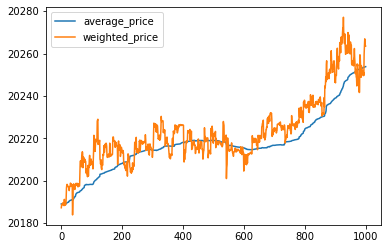

In [7]:
dat = pd.read_csv("order_weight_data.csv")
col = order_book_obj.columns
dat[[x for x in col if x!='average_time']].plot()

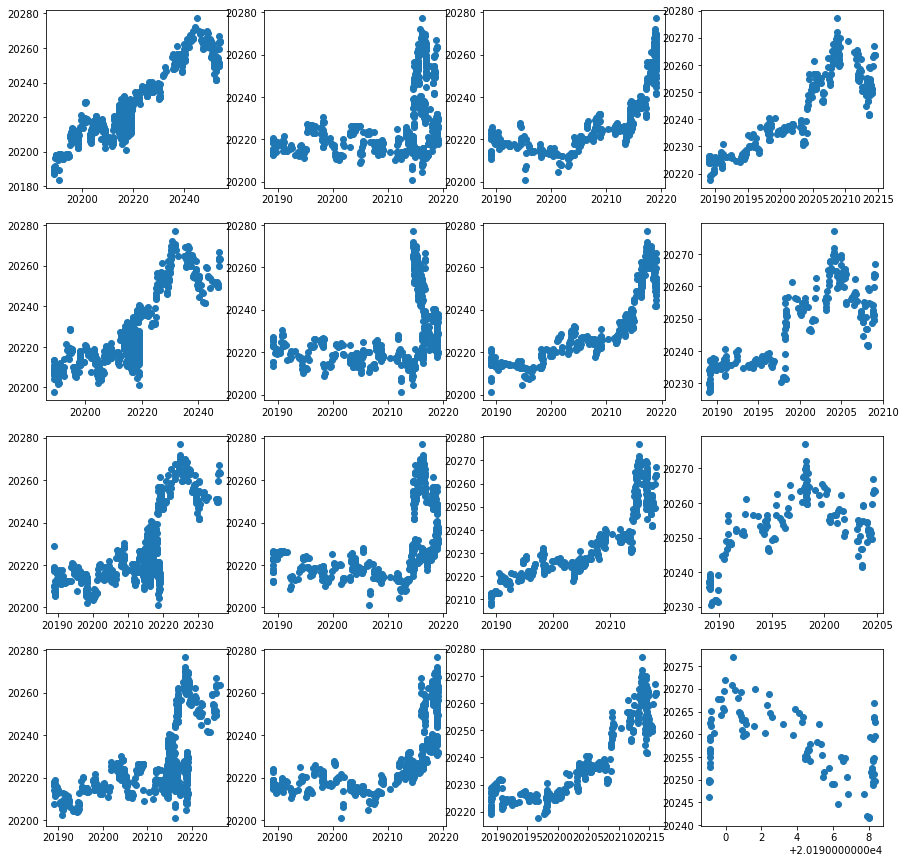

In [8]:
raw = dat[[x for x in col if x!='average_time']].values
rows = raw.shape[0]
figs, axs = plt.subplots(4,4,figsize=(15,15))
lag = 0
for j in range(4):
    for i in range(4):
        axs[i,j].scatter(raw[:(rows-lag),0],raw[lag:,1])
        lag += 60


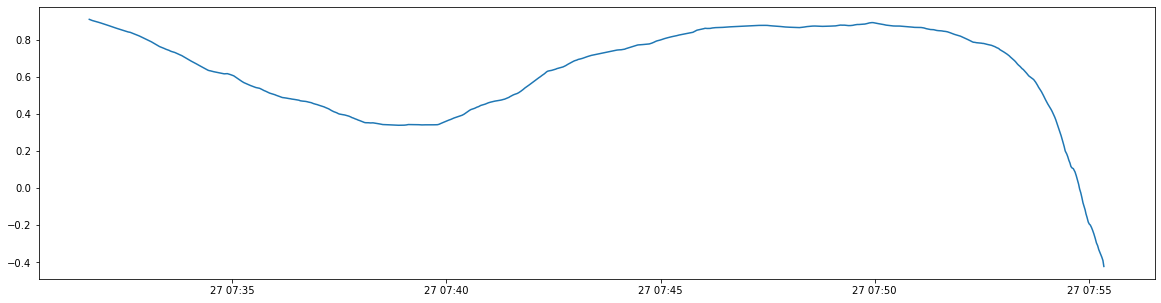

In [9]:
n = 900
lag_corr = np.zeros(shape=(n,))
lag = 0
time = [(datetime(1970, 1, 1) + timedelta(milliseconds=x[0])) for x in dat[['average_time']].values]
for i in range(n):
    lag_corr[i] = np.corrcoef(raw[:(rows-lag),0],raw[lag:,1])[0,1]
    lag += 1
plt.figure(figsize=(20,5))
plt.plot(time[:n],lag_corr)


<AxesSubplot:>

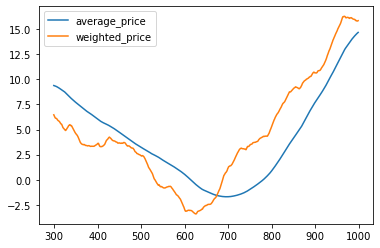

In [50]:
# let's say 
# 1. that the object accumulates the data 'dat' at a given time.
# 2. dat looks back time t
# 3. based on this trend it makes a decision to buy or sell now.
(dat[[x for x in col if x!='average_time']].rolling(window=200).mean()).diff(100).plot()

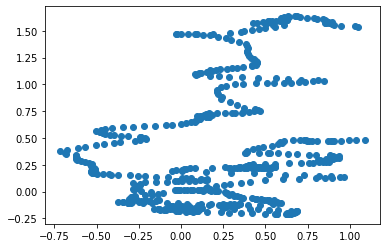

In [44]:
d = dat[[x for x in col if x!='average_time']].rolling(window=200).mean().diff(10)
plt.scatter(d.loc[:800,'weighted_price'],d.loc[199:999,'average_price'])

In [ ]:
# write the object that collects data and generates signal
